# Solar Cell Daily Production & Consumption Model

# Imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, StandardScaler


# Read & Cleaning Data 

In [3]:
pd.options.display.max_columns=50

In [4]:
df = pd.read_csv('./dataset/solar-production-vs-weather-final.csv')
solar_daily = pd.read_csv('./dataset/solar-production-consumption.csv')

In [5]:
df.head(3)

,Unnamed: 0,date_time,elevation,azimuth,dt_iso,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,Date/Time,Power Delivered (W),Energy Delivered (Wh)
0,0,2019-12-15 08:00:00,6.62,121.96,2019-12-15 08:00:00 +0000 UTC,30.442344,-97.769885,53.98,51.39,51.01,57.00,1005,77,3.36,150,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n,2019-12-15 08:00:00,495.0,121.0
1,1,2019-12-15 09:00:00,17.01,131.20,2019-12-15 09:00:00 +0000 UTC,30.442344,-97.769885,53.29,47.59,50.00,56.30,1005,82,9.33,195,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n,2019-12-15 09:00:00,1664.0,416.0
2,2,2019-12-15 10:00:00,25.86,142.55,2019-12-15 10:00:00 +0000 UTC,30.442344,-97.769885,52.99,46.13,50.00,55.99,1005,85,11.68,204,0.0,0.0,0.0,0.0,1,800,Clear,sky is clear,01n,2019-12-15 10:00:00,2500.0,625.0


In [6]:
df.drop(columns=['Unnamed: 0', 'dt_iso', 'lat', 'lon', 'snow_1h', 'snow_3h', 'Date/Time'], inplace=True)

In [7]:
solar_daily.head(3)

,Unnamed: 0,Date/Time,Energy Produced (Wh),Date/Time.1,Energy Consumed (Wh)
0,0,2019-12-13 00:00:00 -0600,17494,12/13/2019 0:00,0
1,1,2019-12-14 00:00:00 -0600,26429,12/14/2019 0:00,0
2,2,2019-12-15 00:00:00 -0600,16744,12/15/2019 0:00,12514


In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
df.set_index(df['date_time'], drop=True, inplace=True)

In [10]:
df.tail(3)

,date_time,elevation,azimuth,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,Power Delivered (W),Energy Delivered (Wh)
date_time,,,,,,,,,,,,,,,,,,,,
2020-05-17 21:00:00,2020-05-17 21:00:00,0.0,0.0,87.87,85.37,84.99,90.0,1012,33,7.27,349,0.0,0.0,1,800,Clear,sky is clear,01d,0.0,0.0
2020-05-17 22:00:00,2020-05-17 22:00:00,0.0,0.0,88.07,88.41,85.65,90.0,1012,38,4.70,350,0.0,0.0,1,721,Haze,haze,50d,0.0,0.0
2020-05-17 23:00:00,2020-05-17 23:00:00,0.0,0.0,88.09,85.39,86.00,91.4,1011,29,5.82,0,0.0,0.0,1,800,Clear,sky is clear,01d,0.0,0.0


In [11]:
df.columns

Index(['date_time', 'elevation', 'azimuth', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon', 'Power Delivered (W)',
       'Energy Delivered (Wh)'],
      dtype='object')

In [12]:
df_mean = df[['elevation', 'azimuth', 'temp', 'feels_like', 'temp_min', \
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', \
       'rain_3h', 'clouds_all', 'Power Delivered (W)', 'Energy Delivered (Wh)']]
df_sum = df[['rain_1h', 'Power Delivered (W)', 'Energy Delivered (Wh)']]
df_max = df[['elevation', 'azimuth', 'feels_like', 'temp_max', 'pressure', 'humidity', \
             'wind_speed', 'clouds_all']]
df_min = df[['feels_like', 'temp_min','pressure', 'humidity', 'wind_speed', 'clouds_all']]

In [13]:
df_mean.head(3)

,elevation,azimuth,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all,Power Delivered (W),Energy Delivered (Wh)
date_time,,,,,,,,,,,,,,,
2019-12-15 08:00:00,6.62,121.96,53.98,51.39,51.01,57.00,1005,77,3.36,150,0.0,0.0,1,495.0,121.0
2019-12-15 09:00:00,17.01,131.20,53.29,47.59,50.00,56.30,1005,82,9.33,195,0.0,0.0,1,1664.0,416.0
2019-12-15 10:00:00,25.86,142.55,52.99,46.13,50.00,55.99,1005,85,11.68,204,0.0,0.0,1,2500.0,625.0


In [14]:
df_mean = df_mean.resample('D').mean()

In [15]:
df_mean.head(3)

,elevation,azimuth,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all,Power Delivered (W),Energy Delivered (Wh)
date_time,,,,,,,,,,,,,,,
2019-12-15,14.451250,112.981250,62.101875,59.520625,59.478125,65.624375,1006.187500,75.250000,6.410625,115.500000,0.015625,0.0,28.812500,4176.437500,1043.937500
2019-12-16,9.619583,75.278333,57.261250,53.526250,53.525417,61.252083,1010.250000,73.875000,7.102917,204.583333,0.048750,0.0,59.500000,0.000000,0.000000
2019-12-17,9.607500,75.236667,41.207917,30.841667,38.852083,44.054167,1024.208333,52.666667,10.241667,266.625000,0.000000,0.0,7.916667,6863.666667,1715.916667


In [16]:
df_mean.columns

Index(['elevation', 'azimuth', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'clouds_all', 'Power Delivered (W)', 'Energy Delivered (Wh)'],
      dtype='object')

In [17]:
df_mean = df_mean.rename(columns={'elevation': 'elevation_mean', 'azimuth': 'azimuth_mean', \
                        'temp': 'temp_mean', 'feels_like': 'feels_like_mean', 
                        'temp_min': 'temp_min_mean', 'temp_max': 'temp_max_mean', \
                        'pressure': 'pressure_mean', 'humidity': 'humidity_mean', \
                        'wind_speed': 'wind_speed_mean', 'wind_deg':'wind_deg_mean', \
                        'rain_1h': 'rain_1h_mean', 'rain_3h': 'rain_3h_mean', \
                        'clouds_all': 'clouds_all_mean', 'Power Delivered (W)': 'power_mean', \
                        'Energy Delivered (Wh)': 'energy_mean'})

In [18]:
df_mean.head(3)

,elevation_mean,azimuth_mean,temp_mean,feels_like_mean,temp_min_mean,temp_max_mean,pressure_mean,humidity_mean,wind_speed_mean,wind_deg_mean,rain_1h_mean,rain_3h_mean,clouds_all_mean,power_mean,energy_mean
date_time,,,,,,,,,,,,,,,
2019-12-15,14.451250,112.981250,62.101875,59.520625,59.478125,65.624375,1006.187500,75.250000,6.410625,115.500000,0.015625,0.0,28.812500,4176.437500,1043.937500
2019-12-16,9.619583,75.278333,57.261250,53.526250,53.525417,61.252083,1010.250000,73.875000,7.102917,204.583333,0.048750,0.0,59.500000,0.000000,0.000000
2019-12-17,9.607500,75.236667,41.207917,30.841667,38.852083,44.054167,1024.208333,52.666667,10.241667,266.625000,0.000000,0.0,7.916667,6863.666667,1715.916667


In [19]:
df_sum = df_sum.resample('D').sum()

In [20]:
df_sum = df_sum.rename(columns={'rain_1h': 'rain_1h_sum', 'Power Delivered (W)': 'power_sum', \
                       'Energy Delivered (Wh)': 'energy_sum'})

In [21]:
df_sum.head(3)

,rain_1h_sum,power_sum,energy_sum
date_time,,,
2019-12-15,0.25,66823.0,16703.0
2019-12-16,1.17,0.0,0.0
2019-12-17,0.00,164728.0,41182.0


In [22]:
df_max = df_max.resample('D').max()

In [23]:
df_max = df_max.rename(columns={'elevation': 'elevation_max', 'azimuth': 'azimuth_max', \
                       'feels_like': 'feels_like_max', 'temp_max': 'temp_max_max', \
                       'pressure': 'pressure_max', 'humidity': 'humidity_max', \
                       'wind_speed': 'wind_speed_max', 'clouds_all': 'clouds_all_max'})

In [24]:
df_max.head(3)

,elevation_max,azimuth_max,feels_like_max,temp_max_max,pressure_max,humidity_max,wind_speed_max,clouds_all_max
date_time,,,,,,,,
2019-12-15,35.93,239.05,76.71,81.16,1009,93,11.68,90
2019-12-16,35.87,238.95,70.81,75.20,1017,93,13.87,100
2019-12-17,35.82,238.85,40.60,55.04,1029,71,16.11,90


In [25]:
df_min = df_min.resample('D').min()

In [26]:
df_min = df_min.rename(columns={'feels_like': 'feels_like_min', 'temp_min': 'temp_min_min',\
                       'pressure': 'pressure_min', 'humidity': 'humidity_min', \
                       'wind_speed': 'wind_speed_min', 'clouds_all': 'clouds_all_min'})

In [27]:
df_daily = pd.concat([df_mean, df_sum, df_min, df_max], axis=1)

In [28]:
df_daily.head(3)

,elevation_mean,azimuth_mean,temp_mean,feels_like_mean,temp_min_mean,temp_max_mean,pressure_mean,humidity_mean,wind_speed_mean,wind_deg_mean,rain_1h_mean,rain_3h_mean,clouds_all_mean,power_mean,energy_mean,rain_1h_sum,power_sum,energy_sum,feels_like_min,temp_min_min,pressure_min,humidity_min,wind_speed_min,clouds_all_min,elevation_max,azimuth_max,feels_like_max,temp_max_max,pressure_max,humidity_max,wind_speed_max,clouds_all_max
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-15,14.451250,112.981250,62.101875,59.520625,59.478125,65.624375,1006.187500,75.250000,6.410625,115.500000,0.015625,0.0,28.812500,4176.437500,1043.937500,0.25,66823.0,16703.0,45.86,50.00,1004,44,3.36,1,35.93,239.05,76.71,81.16,1009,93,11.68,90
2019-12-16,9.619583,75.278333,57.261250,53.526250,53.525417,61.252083,1010.250000,73.875000,7.102917,204.583333,0.048750,0.0,59.500000,0.000000,0.000000,1.17,0.0,0.0,33.24,39.99,1004,50,3.36,1,35.87,238.95,70.81,75.20,1017,93,13.87,100
2019-12-17,9.607500,75.236667,41.207917,30.841667,38.852083,44.054167,1024.208333,52.666667,10.241667,266.625000,0.000000,0.0,7.916667,6863.666667,1715.916667,0.00,164728.0,41182.0,21.25,30.00,1017,20,6.93,1,35.82,238.85,40.60,55.04,1029,71,16.11,90


In [29]:
df_daily.columns

Index(['elevation_mean', 'azimuth_mean', 'temp_mean', 'feels_like_mean',
       'temp_min_mean', 'temp_max_mean', 'pressure_mean', 'humidity_mean',
       'wind_speed_mean', 'wind_deg_mean', 'rain_1h_mean', 'rain_3h_mean',
       'clouds_all_mean', 'power_mean', 'energy_mean', 'rain_1h_sum',
       'power_sum', 'energy_sum', 'feels_like_min', 'temp_min_min',
       'pressure_min', 'humidity_min', 'wind_speed_min', 'clouds_all_min',
       'elevation_max', 'azimuth_max', 'feels_like_max', 'temp_max_max',
       'pressure_max', 'humidity_max', 'wind_speed_max', 'clouds_all_max'],
      dtype='object')

# Selecting Features & Target (Labels)

In [30]:
X = df_daily[['elevation_mean', 'azimuth_mean', 'temp_mean', 'feels_like_mean',
        'pressure_mean', 'humidity_mean','wind_speed_mean', 'wind_deg_mean',
        'clouds_all_mean', 'rain_1h_sum','temp_min_min', 'elevation_max', 'temp_max_max',
        ]]
y = df_daily['energy_sum']

# Correlation Map for Energy Production

In [31]:
corr_energy = X.corrwith(y).sort_values(ascending=False).to_frame()

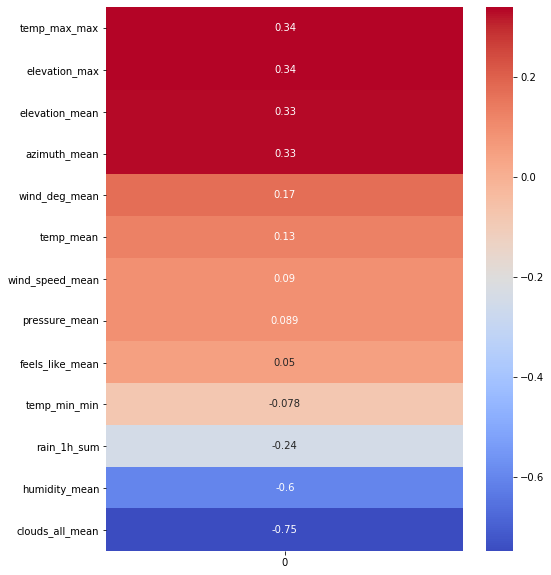

In [32]:
plt.figure(figsize=(8, 10))
sns.heatmap(corr_energy, cmap='coolwarm', annot=True)

In [33]:
solar_daily = solar_daily.drop([0, 1, 2, 3, 156])

In [34]:
solar_daily['Date/Time'] = solar_daily['Date/Time'].map(lambda x: x[:11])

In [35]:
solar_daily['Date/time'] = pd.to_datetime(solar_daily['Date/Time'])

In [36]:
solar_daily = solar_daily.set_index(solar_daily['Date/Time'])

In [37]:
y_consumption = solar_daily['Energy Consumed (Wh)']

In [38]:
y_consumption.shape

(152,)

In [39]:
X_consumption = X.drop(pd.Timestamp('2019-12-15'))

In [40]:
X_consumption = X_consumption.drop(pd.Timestamp('2019-12-16'))

In [41]:
X_consumption = X_consumption.drop(pd.Timestamp('2020-05-17'))

In [42]:
X_consumption.shape

(152, 13)

In [43]:
y_consumption

Date/Time
2019-12-17     17798
2019-12-18     15837
2019-12-19     15174
2019-12-20     20917
2019-12-21     15187
               ...  
2020-05-12     17542
2020-05-13     24948
2020-05-14     39588
2020-05-15     34723
2020-05-16     22731
Name: Energy Consumed (Wh), Length: 152, dtype: int64

In [44]:
corr_consumption = X_consumption.corrwith(y_consumption).sort_values(ascending=False).to_frame()

In [45]:
corr_consumption

,0
azimuth_mean,0.563477
elevation_mean,0.540330
elevation_max,0.539783
temp_max_max,0.388355
temp_mean,0.370974
feels_like_mean,0.345244
temp_min_min,0.333264
wind_speed_mean,0.170463
rain_1h_sum,-0.017801
clouds_all_mean,-0.078841


# Correlation Map for Consumption

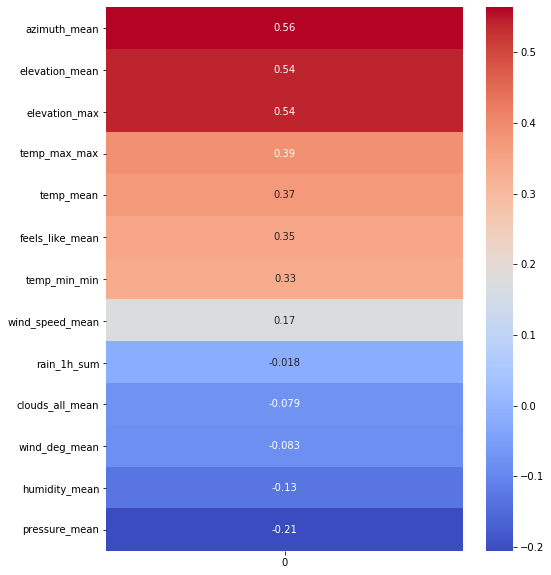

In [46]:
plt.figure(figsize=(8, 10))
sns.heatmap(corr_consumption, cmap='coolwarm', annot=True)

In [47]:
X.head()

,elevation_mean,azimuth_mean,temp_mean,feels_like_mean,pressure_mean,humidity_mean,wind_speed_mean,wind_deg_mean,clouds_all_mean,rain_1h_sum,temp_min_min,elevation_max,temp_max_max
date_time,,,,,,,,,,,,,
2019-12-15,14.451250,112.981250,62.101875,59.520625,1006.187500,75.250000,6.410625,115.500000,28.812500,0.25,50.00,35.93,81.16
2019-12-16,9.619583,75.278333,57.261250,53.526250,1010.250000,73.875000,7.102917,204.583333,59.500000,1.17,39.99,35.87,75.20
2019-12-17,9.607500,75.236667,41.207917,30.841667,1024.208333,52.666667,10.241667,266.625000,7.916667,0.00,30.00,35.82,55.04
2019-12-18,9.597917,75.194583,41.304583,33.247500,1029.750000,39.958333,4.888750,248.958333,1.000000,0.00,25.00,35.78,61.00
2019-12-19,9.590000,75.151667,41.941250,34.000833,1026.791667,47.666667,5.427083,176.625000,1.000000,0.00,24.01,35.74,59.00


# Energy Production Linear Regression Model 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
linreg_pro = LinearRegression()

In [50]:
linreg_pro.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
linreg_pro.score(X_train, y_train)

0.7098403141048727

In [52]:
linreg_pro.score(X_test, y_test)

0.7317420866771344

In [53]:
cross_val_score(linreg_pro, X_train, y_train)

array([ 0.59462974,  0.80788869,  0.53515581, -0.17948809,  0.5036791 ])

# Production Regression with Regularization - Lasso

In [135]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [120]:
l_alphas = np.logspace(0, 5, 100)

In [137]:
lasso_pro = LassoCV(alphas=l_alphas,
                   cv=5,
                   max_iter=50_000)

In [138]:
lasso_pro.fit(X_train_ss, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [139]:
lasso_pro.alpha_

335.1602650938841

In [142]:
cross_val_score(lasso_pro, X_train_ss, y_train).mean()

0.46067949481183323

In [143]:
cross_val_score(lasso_pro, X_test_ss, y_test).mean()

0.774801491455641

### Lasso did not provide considerable R2 score improvement

# Energy Consumption Linear Regression Model

In [55]:
X_con_train, X_con_test, y_con_train, y_con_test = train_test_split(X_consumption, y_consumption)

In [56]:
linreg_con = LinearRegression()

In [57]:
linreg_con.fit(X_con_train, y_con_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
linreg_con.score(X_con_train, y_con_train)

0.43161940145632965

In [59]:
linreg_con.score(X_con_test, y_con_test)

0.46213921406878133

In [60]:
cross_val_score(linreg_con, X_con_train, y_con_train)

array([ 0.20369911,  0.47204812, -0.65310537,  0.26735162,  0.43267544])

# Linear Regression Regularization

In [103]:
ridge_cv = RidgeCV(alphas = r_alphas,
                  scoring='r2',
                  cv=5)

In [ ]:
ridge_cv.fit(X)

# Data Import for Prediction

In [61]:
df = pd.read_csv('./dataset/weather-sun-pred.csv')

In [62]:
df.head(3)

,Unnamed: 0,date_time,elevation,azimuth,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
0,0,2020-05-23 00:00:00,0.0,0.0,2019-05-23 00:00:00 +0000 UTC,86.43,87.44,84.2,89.01,1006,55,10.29,170,0.0,0.0,1
1,1,2020-05-23 01:00:00,0.0,0.0,2019-05-23 01:00:00 +0000 UTC,84.36,85.91,82.4,86.00,1006,61,10.29,160,0.0,0.0,1
2,2,2020-05-23 02:00:00,0.0,0.0,2019-05-23 02:00:00 +0000 UTC,82.49,86.86,81.0,84.48,1007,69,6.93,160,0.0,0.0,1


In [63]:
df.drop(columns=['Unnamed: 0', 'dt_iso'], inplace=True)

In [64]:
df['date_time'] = pd.to_datetime(df['date_time'])

df.set_index(df['date_time'], drop=True, inplace=True)

In [65]:
df.head(3)

,date_time,elevation,azimuth,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
date_time,,,,,,,,,,,,,,
2020-05-23 00:00:00,2020-05-23 00:00:00,0.0,0.0,86.43,87.44,84.2,89.01,1006,55,10.29,170,0.0,0.0,1
2020-05-23 01:00:00,2020-05-23 01:00:00,0.0,0.0,84.36,85.91,82.4,86.00,1006,61,10.29,160,0.0,0.0,1
2020-05-23 02:00:00,2020-05-23 02:00:00,0.0,0.0,82.49,86.86,81.0,84.48,1007,69,6.93,160,0.0,0.0,1


In [66]:
df.columns

Index(['date_time', 'elevation', 'azimuth', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'clouds_all'],
      dtype='object')

In [67]:
df_mean = df[['elevation', 'azimuth', 'temp', 'feels_like', 'temp_min', \
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', \
       'rain_3h', 'clouds_all']]
df_sum = df[['rain_1h']]
df_max = df[['elevation', 'azimuth', 'feels_like', 'temp_max', 'pressure', 'humidity', \
             'wind_speed', 'clouds_all']]
df_min = df[['feels_like', 'temp_min','pressure', 'humidity', 'wind_speed', 'clouds_all']]

In [68]:
df_mean = df_mean.resample('D').mean()

In [69]:
df_mean.head(3)

,elevation,azimuth,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
date_time,,,,,,,,,,,,,
2020-05-23,23.436000,101.120400,82.108400,84.492800,80.435200,84.042400,1010.120000,68.400000,9.477600,134.000000,0.000000,0.0,57.120000
2020-05-24,24.466250,105.317917,81.187917,82.757917,79.575000,83.199167,1012.541667,68.833333,10.327083,135.000000,0.000000,0.0,68.333333
2020-05-25,24.517917,105.300833,79.482500,81.090833,77.529167,81.693333,1013.250000,68.291667,8.648750,114.166667,0.034167,0.0,61.625000


In [70]:
df_mean = df_mean.rename(columns={'elevation': 'elevation_mean', 'azimuth': 'azimuth_mean', \
                        'temp': 'temp_mean', 'feels_like': 'feels_like_mean', 
                        'temp_min': 'temp_min_mean', 'temp_max': 'temp_max_mean', \
                        'pressure': 'pressure_mean', 'humidity': 'humidity_mean', \
                        'wind_speed': 'wind_speed_mean', 'wind_deg':'wind_deg_mean', \
                        'rain_1h': 'rain_1h_mean', 'rain_3h': 'rain_3h_mean', \
                        'clouds_all': 'clouds_all_mean'})


In [71]:
df_sum = df_sum.resample('D').sum()

In [72]:
df_sum = df_sum.rename(columns={'rain_1h': 'rain_1h_sum'})

In [73]:
df_max = df_max.resample('D').max()

df_max = df_max.rename(columns={'elevation': 'elevation_max', 'azimuth': 'azimuth_max', \
                       'feels_like': 'feels_like_max', 'temp_max': 'temp_max_max', \
                       'pressure': 'pressure_max', 'humidity': 'humidity_max', \
                       'wind_speed': 'wind_speed_max', 'clouds_all': 'clouds_all_max'})

In [74]:
df_min = df_min.resample('D').min()

df_min = df_min.rename(columns={'feels_like': 'feels_like_min', 'temp_min': 'temp_min_min',\
                       'pressure': 'pressure_min', 'humidity': 'humidity_min', \
                       'wind_speed': 'wind_speed_min', 'clouds_all': 'clouds_all_min'})

In [75]:
df_pred = pd.concat([df_mean, df_sum, df_min, df_max], axis=1)


In [76]:
df_pred.head(3)

,elevation_mean,azimuth_mean,temp_mean,feels_like_mean,temp_min_mean,temp_max_mean,pressure_mean,humidity_mean,wind_speed_mean,wind_deg_mean,rain_1h_mean,rain_3h_mean,clouds_all_mean,rain_1h_sum,feels_like_min,temp_min_min,pressure_min,humidity_min,wind_speed_min,clouds_all_min,elevation_max,azimuth_max,feels_like_max,temp_max_max,pressure_max,humidity_max,wind_speed_max,clouds_all_max
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-23,23.436000,101.120400,82.108400,84.492800,80.435200,84.042400,1010.120000,68.400000,9.477600,134.000000,0.000000,0.0,57.120000,0.00,78.42,73.99,1006,50,5.82,1,78.47,291.91,92.05,91.99,1013,87,14.99,90
2020-05-24,24.466250,105.317917,81.187917,82.757917,79.575000,83.199167,1012.541667,68.833333,10.327083,135.000000,0.000000,0.0,68.333333,0.00,77.09,74.66,1010,48,4.70,20,78.62,292.06,88.77,90.31,1015,89,17.22,90
2020-05-25,24.517917,105.300833,79.482500,81.090833,77.529167,81.693333,1013.250000,68.291667,8.648750,114.166667,0.034167,0.0,61.625000,0.82,73.29,72.50,1011,51,4.70,1,78.75,292.19,90.70,90.69,1015,84,13.87,90


In [77]:
X_pred = df_pred[['elevation_mean', 'azimuth_mean', 'temp_mean', 'feels_like_mean',
        'pressure_mean', 'humidity_mean','wind_speed_mean', 'wind_deg_mean',
        'clouds_all_mean', 'rain_1h_sum','temp_min_min', 'elevation_max', 'temp_max_max',
        ]]

# Production Prediction

In [78]:
prod_pred = linreg_pro.predict(X_pred)

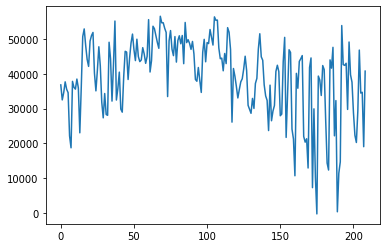

In [79]:
plt.plot(prod_pred)

# Consumption Prediction

In [80]:
cons_pred = linreg_con.predict(X_pred)

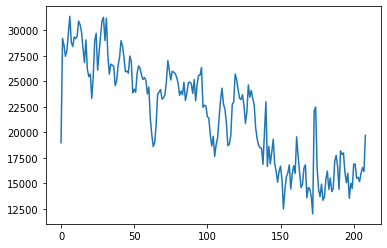

In [81]:
plt.plot(cons_pred)

# Prediction to DataFrame

In [82]:
df_prod_pred = pd.DataFrame(prod_pred, columns=['production_prediction'])

In [83]:
df_prod_pred.shape

(209, 1)

In [84]:
df_cons_pred = pd.DataFrame(cons_pred, columns=['consumption_prediction'])

In [85]:
df_datetime = df[['date_time']].resample('D')

In [86]:
df_datetime = pd.DataFrame(df_datetime)

In [87]:
df_pred_final = pd.concat([df_datetime, df_prod_pred, df_cons_pred], axis=1)

In [88]:
df_pred_final = df_pred_final.rename(columns={0: 'date_time'})

In [89]:
df_pred_final = df_pred_final.set_index('date_time')

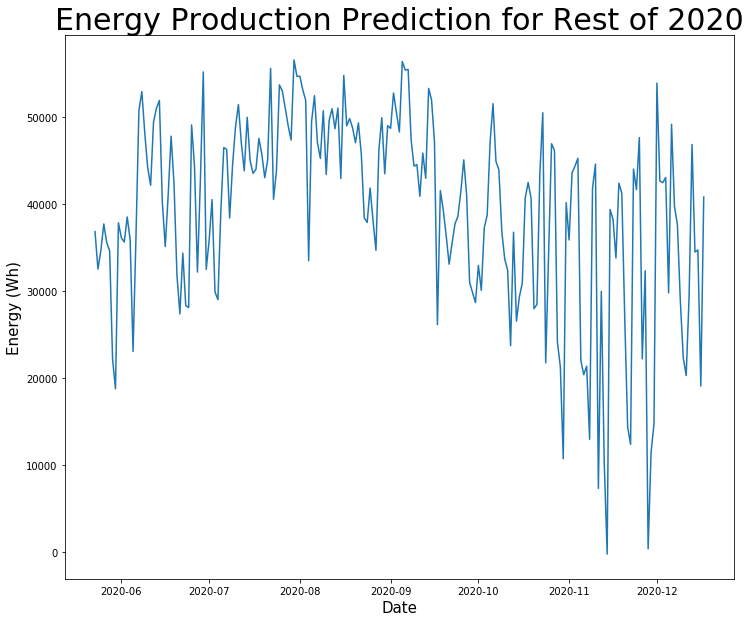

In [96]:
plt.figure(figsize=(12, 10))

prod, = plt.plot(df_pred_final['production_prediction'], label='Production')
# cons, = plt.plot(df_pred_final['consumption_prediction'], label='Consumption', color='red')

plt.title('Energy Production Prediction for Rest of 2020', size=30)
# plt.legend(handles=[prod, cons])
plt.xlabel('Date', size=15)
plt.ylabel('Energy (Wh)', size=15);

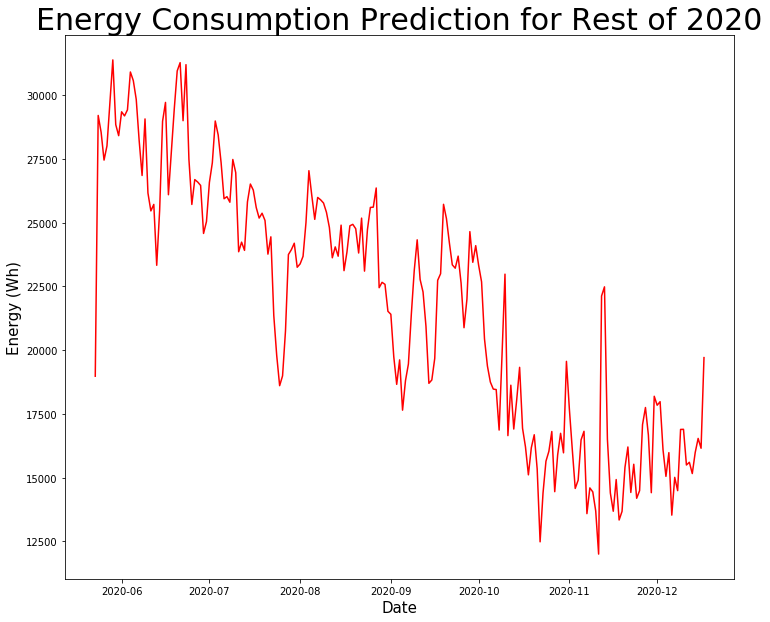

In [99]:
plt.figure(figsize=(12, 10))

# prod, = plt.plot(df_pred_final['production_prediction'], label='Production')
cons, = plt.plot(df_pred_final['consumption_prediction'], label='Consumption', color='red')

plt.title('Energy Consumption Prediction for Rest of 2020', size=30)
# plt.legend(handles=[prod, cons])
plt.xlabel('Date', size=15)
plt.ylabel('Energy (Wh)', size=15);